In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind

In [104]:
hg = pd.read_csv("Wholesale+Customers+Data.csv")
hg

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [105]:
hg.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [106]:
hg.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [107]:
hg.describe(include = 'all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [108]:
hg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [109]:
nk=pd.pivot_table(hg, index=["Region"], values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"],
                 aggfunc="sum", dropna=True)
nk

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,
Lisbon,104327,204136,854833,231026,570037,422454
Oporto,54506,173311,464721,190132,433274,239144
Other,512110,890410,3960577,930492,2495251,1888759


In [110]:
nk["Total"] = nk["Fresh"]+nk["Milk"]+nk["Grocery"]+nk["Frozen"]+nk["Detergents_Paper"]+nk["Delicatessen"]

In [111]:
nk

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Region,,,,,,,
Lisbon,104327,204136,854833,231026,570037,422454,2386813
Oporto,54506,173311,464721,190132,433274,239144,1555088
Other,512110,890410,3960577,930492,2495251,1888759,10677599


In [112]:
nk[nk["Total"]==nk["Total"].max()]

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Region,,,,,,,
Other,512110,890410,3960577,930492,2495251,1888759,10677599


# Other Region has most spending 


In [113]:
nk[nk["Total"]==nk["Total"].min()]

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Region,,,,,,,
Oporto,54506,173311,464721,190132,433274,239144,1555088


# Oporto Region has less spending

In [114]:
nk=pd.pivot_table(hg, index=["Channel"], values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"],
                 aggfunc="sum", dropna=True)
nk

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,
Hotel,421955,235587,4015717,1116979,1180717,1028614
Retail,248988,1032270,1264414,234671,2317845,1521743


In [115]:
nk["Totalchannel"] = nk["Fresh"]+nk["Milk"]+nk["Grocery"]+nk["Frozen"]+nk["Detergents_Paper"]+nk["Delicatessen"]

In [116]:
nk

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Totalchannel
Channel,,,,,,,
Hotel,421955,235587,4015717,1116979,1180717,1028614,7999569
Retail,248988,1032270,1264414,234671,2317845,1521743,6619931


In [117]:
nk[nk["Totalchannel"]==nk["Totalchannel"].max()]

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Totalchannel
Channel,,,,,,,
Hotel,421955,235587,4015717,1116979,1180717,1028614,7999569


# Hotel channel has most spendings

In [118]:
nk[nk["Totalchannel"]==nk["Totalchannel"].min()]

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Totalchannel
Channel,,,,,,,
Retail,248988,1032270,1264414,234671,2317845,1521743,6619931


# Retail channel has low spending

In [119]:
pd.pivot_table(hg, index=["Channel"], values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"],
                 aggfunc="mean", dropna=True)


,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,
Hotel,1415.956376,790.560403,13475.560403,3748.251678,3962.137584,3451.724832
Retail,1753.436620,7269.507042,8904.323944,1652.612676,16322.852113,10716.500000


In [120]:
pd.pivot_table(hg, index=["Channel"], values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"],
                 aggfunc="median", dropna=True)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,
Hotel,821,385.5,9581.5,2057.5,2684,2157
Retail,1350,5614.5,5993.5,1081.0,12390,7812


In [121]:
pd.pivot_table(hg, index=["Channel"], values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"],
                 aggfunc="std", dropna=True)


,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,
Hotel,3147.426922,1104.093673,13831.687502,5643.912500,3545.513391,4352.165571
Retail,1953.797047,6291.089697,8987.714750,1812.803662,12267.318094,9679.631351


In [122]:
pd.pivot_table(hg, index=["Region"], values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"],
                 aggfunc="mean", dropna=True)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,
Lisbon,1354.896104,2651.116883,11101.727273,3000.337662,7403.077922,5486.415584
Oporto,1159.702128,3687.468085,9887.680851,4045.361702,9218.595745,5088.170213
Other,1620.601266,2817.753165,12533.471519,2944.594937,7896.363924,5977.085443


In [123]:
pd.pivot_table(hg, index=["Region"], values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"],
                 aggfunc="median", dropna=True)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,
Lisbon,806,737,7363.0,1801,3838,3748.0
Oporto,898,811,8090.0,1455,6114,2374.0
Other,994,856,8752.5,1498,4732,3684.5


In [124]:
pd.pivot_table(hg, index=["Channel"], values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"],
                 aggfunc="std", dropna=True)

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,
Hotel,3147.426922,1104.093673,13831.687502,5643.912500,3545.513391,4352.165571
Retail,1953.797047,6291.089697,8987.714750,1812.803662,12267.318094,9679.631351


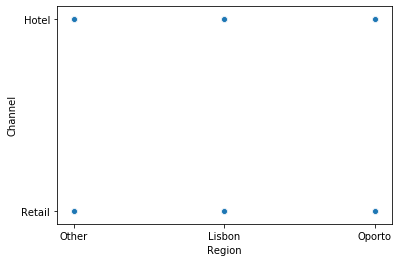

In [125]:
sns.scatterplot(x="Region", y="Channel", data=hg)

# all varieties not show similar behaviour across Region and Channel

In [126]:
hg["Fresh"].std()


12647.328865076894

In [127]:
hg["Grocery"].std()

9503.162828994346

In [128]:
hg["Milk"].std()

7380.377174570843

In [129]:
hg["Frozen"].std()

4854.673332592367

In [130]:
hg["Detergents_Paper"].std()

4767.8544479042

In [131]:
hg["Delicatessen"].std()

2820.1059373693975

# Fresh shows most Inconsistent Behaviour

# Delicatessen shows less Inconsistent Behaviour
# Answers - 1.3

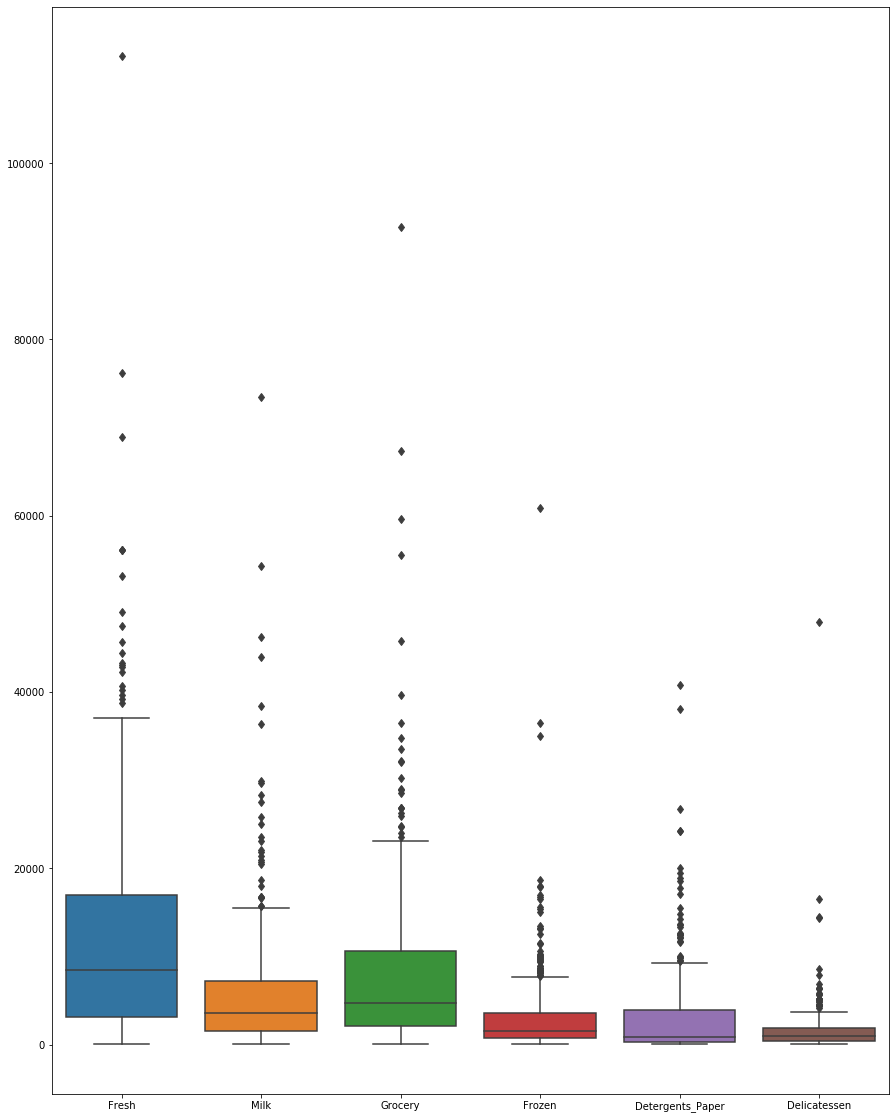

In [133]:
plt.figure(figsize=(15,20))
sns.boxplot(data=hg[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']],fliersize=6)


# Outliers are given in Data
# Answer 1.4

In [134]:
ak = pd.read_csv("Survey.csv")
ak

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [135]:
ak.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [136]:
pd.crosstab(index=ak['Gender'], columns=ak['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


# Answer- 2.1.1


In [137]:
pd.crosstab(index=ak['Gender'], columns=ak['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


# Answer-2.1.2

In [139]:
pd.crosstab(index=ak['Gender'], columns=ak['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


# Answer-2.1.3

In [140]:
pd.crosstab(index=ak['Gender'], columns=ak['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# Answer-2.1.4

In [141]:
ak.groupby('Gender').count()

,ID,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
Gender,,,,,,,,,,,,,
Female,33,33,33,33,33,33,33,33,33,33,33,33,33
Male,29,29,29,29,29,29,29,29,29,29,29,29,29


# male counts is 29
# female counts is 33
# Total Counts is 62

In [151]:
# Sample Space = 62
# Event Outcome = 29
Male_Prob = 29/62 * 100

In [153]:
MALEPROBABLITY=round(Male_Prob, 2)
print(str(MALEPROBABLITY)+'%')

46.77%


In [155]:
# Sample Space = 62
# Event Outcome = 33
Female_Prob = 33/62 * 100

In [156]:
FEMALEPROBABLITY=round(Female_Prob, 2)
print(str(FEMALEPROBABLITY)+'%')

53.23%


# Anwer - 2.2.1

In [157]:
ak.groupby('Gender').count()

,ID,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
Gender,,,,,,,,,,,,,
Female,33,33,33,33,33,33,33,33,33,33,33,33,33
Male,29,29,29,29,29,29,29,29,29,29,29,29,29


In [158]:
pd.crosstab(index=ak["Gender"],columns=ak["Major"])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [159]:
# Sample Space = 29
# Event Outcome = 4
Accounting_probability = 4/29*100

In [160]:
ACCPROBABLITY=round(Accounting_probability, 2)
print(str(ACCPROBABLITY)+'%')

13.79%


In [161]:
# Sample Space = 29
# Event Outcome = 1
Cis_probability = 1/29*100
CISPROBABLITY=round(Cis_probability, 2)
print(str(CISPROBABLITY)+'%')

3.45%


In [163]:
# Sample Space = 29
# Event Outcome = 4
Economics_probability = 4/29*100
ECONOMICSPROBABLITY=round(Economics_probability, 2)
print(str(ECONOMICSPROBABLITY)+'%')

13.79%


In [164]:
# Sample Space = 29
# Event Outcome = 2
International_probability = 2/29*100
INTERNATIONALPROBABLITY=round(International_probability, 2)
print(str(INTERNATIONALPROBABLITY)+'%')

6.9%


In [165]:
# Sample Space = 29
# Event Outcome = 6
Management_probability = 6/29*100
MANAGEMENTPROBABLITY=round(Management_probability, 2)
print(str(MANAGEMENTPROBABLITY)+'%')

20.69%


In [166]:
# Sample Space = 29
# Event Outcome = 4
Other_probability = 4/29*100
OTHERPROBABLITY=round(Other_probability, 2)
print(str(OTHERPROBABLITY)+'%')

13.79%


In [168]:
# Sample Space = 29
# Event Outcome = 5
RetailingMarketing_probability = 5/29*100
RETAILINGMARKETINGPROBABLITY=round(RetailingMarketing_probability, 2)
print(str(RETAILINGMARKETINGPROBABLITY)+'%')

17.24%


In [169]:
# Sample Space = 29
# Event Outcome = 3
Undecided_probability = 3/29*100
UNDECIDEDPROBABLITY=round(Undecided_probability, 2)
print(str(UNDECIDEDPROBABLITY)+'%')

10.34%


# Cell-160 to 169 answers of 2.2.2

In [170]:
# Sample Space = 33
# Event Outcome = 3
Accounting_probability = 3/33*100
ACCPROBABLITY=round(Accounting_probability, 2)
print(str(ACCPROBABLITY)+'%')

# Sample Space = 33
# Event Outcome = 3
Cis_probability = 3/33*100
CISPROBABLITY=round(Cis_probability, 2)
print(str(CISPROBABLITY)+'%')

# Sample Space = 33
# Event Outcome = 7
Economics_probability = 7/33*100
ECONOMICSPROBABLITY=round(Economics_probability, 2)
print(str(ECONOMICSPROBABLITY)+'%')

# Sample Space = 33
# Event Outcome = 4
International_probability = 4/33*100
INTERNATIONALPROBABLITY=round(International_probability, 2)
print(str(INTERNATIONALPROBABLITY)+'%')

# Sample Space = 33
# Event Outcome = 4
Management_probability = 4/33*100
MANAGEMENTPROBABLITY=round(Management_probability, 2)
print(str(MANAGEMENTPROBABLITY)+'%')

# Sample Space = 33
# Event Outcome = 3
Other_probability = 3/33*100
OTHERPROBABLITY=round(Other_probability, 2)
print(str(OTHERPROBABLITY)+'%')

# Sample Space = 33
# Event Outcome = 9
RetailingMarketing_probability = 9/33*100
RETAILINGMARKETINGPROBABLITY=round(RetailingMarketing_probability, 2)
print(str(RETAILINGMARKETINGPROBABLITY)+'%')

# Sample Space = 33
# Event Outcome = 0
Undecided_probability = 0/33*100
UNDECIDEDPROBABLITY=round(Undecided_probability, 2)
print(str(UNDECIDEDPROBABLITY)+'%')

9.09%
9.09%
21.21%
12.12%
12.12%
9.09%
27.27%
0.0%


# Answers of 2.2.2- Female Students

In [171]:
pd.crosstab(index=ak['Gender'], columns=ak['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [172]:
def event_probability(event_outcomes, sample_space):
    probability = (event_outcomes / sample_space) * 100
    return round(probability, 1)

In [173]:
# Sample Space = 29
# Event Outcome = 17
Male_Intent_probability = event_probability(17, 29)

In [174]:
# Sample Space = 33
# Event Outcome = 11
Female_Intent_probability = event_probability(11, 33)

In [175]:
print(str(Male_Intent_probability) + '%') 
print(str(Female_Intent_probability) + '%')

58.6%
33.3%


# Answer of 2.2.3

In [176]:
pd.crosstab(index=ak['Gender'], columns=ak['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [177]:
# Sample Space = 29
# Event Outcome = 7
Male_Full_Time_probability = event_probability(7, 29)

In [178]:
# Sample Space = 29
# Event Outcome = 19
Male_Part_Time_probability = event_probability(19, 29)

In [179]:
# Sample Space = 29
# Event Outcome = 3
Male_Unemployed_probability = event_probability(3, 29)

In [181]:
print(str(Male_Full_Time_probability) + '%') 
print(str(Male_Part_Time_probability) + '%') 
print(str(Male_Unemployed_probability) + '%')

24.1%
65.5%
10.3%


# Anwer of 2.2.4

In [186]:
pd.crosstab(index=ak['Gender'], columns=ak['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [187]:
# Sample Space = 29
# Event Outcome = 26
Male_Laptop_probability = event_probability(26, 29)

In [188]:
# Sample Space = 33
# Event Outcome = 29
Female_Laptop_probability = event_probability(29, 33)

In [189]:
print(str(Male_Laptop_probability) + '%') 
print(str(Female_Laptop_probability) + '%')

89.7%
87.9%


# Anwer of 2.2.5

# Answer to Question 2.3

In [190]:
# Case 1

#Columns Variable = Majors
#Rows Variable = Gender

# Based on the above computed probabilities it can be said that the Column Variable i.e Majors are not independent of Gender
# B'coz the probability of Male are not equal to the probability of Female in niether case i.e Accounting	CIS 	 Economics/Finance	International Business	Management	Other	Retailing/Marketing	Un

In [191]:
# Case 2
#Columns Variable = Employment Status
#Rows Variable = Gender

# Based on the above computed probabilities it can be said that the Column Variable i.e Employment Status are not independent of Gender
# B'coz the probability of Male are not equal to the probability of Female in niether case i.e Full-Time	Part-Time	Unemployed

In [192]:
# Case 3
#Columns Variable = Grad Intention
#Rows Variable = Gender

# Based on the above computed probabilities it can be said that the Column Variable i.e Grad Intention are not independent of Gender
# B'coz the probability of Male are not equal to the probability of Female.

In [193]:
ak.loc[:,["Salary","Spending","Text Messages"]].mean()

Salary            48.548387
Spending         482.016129
Text Messages    246.209677
dtype: float64

In [194]:
ak.loc[:,["Salary","Spending","Text Messages"]].median()

Salary            50.0
Spending         500.0
Text Messages    200.0
dtype: float64

In [195]:
ak.loc[:,["Salary","Spending","Text Messages"]].mode()

,Salary,Spending,Text Messages
0,40.0,500,300


# # Mean, Median & Mode of "Salary" are not equal therfore they are not said to be normally distributed
# Mean, Median & Mode of "Spending" are not equal therfore they are not said to be normally distributed
# Mean, Median & Mode of "Text Messages" are not equal therfore they are not said to be normally distributed


In [196]:
case3=pd.read_csv("A+&+B+shingles.csv")
case3

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [197]:
# H0: μ >= 0.35(Null Hypothesis)
# Ha: μ < 0.35(Alternate Hypothesis)

In [198]:
case3.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [200]:

stats.ttest_1samp(case3['A'],.35)

Ttest_1sampResult(statistic=-1.4735046253382782, pvalue=0.14955266289815025)

# Answer of 3.1

In [202]:
stats.ttest_1samp(case3['A'],.35)

Ttest_1sampResult(statistic=-1.4735046253382782, pvalue=0.14955266289815025)

# Answer of 3.2

In [206]:
# H0: μA = μB(Null Hypothesis)
# Ha: μA ≠ μB(Alternate Hypothesis)

ttest_sp = stats.ttest_rel(case3['A'],case3['B'],nan_policy='omit')
ttest_sp


Ttest_relResult(statistic=0.8445012483270872, pvalue=0.4050738703654352)

In [207]:
# If we compare the means of the two sample distributions, we see that even though visually it seems as mean of "A" Shingles is not eual to mean of "B" Shingles, statistically it is also proved true.
# from above calculation we can say that we failed to reject the null hypothesis as the probability(0.40507) is higher than level of significance i.e alpha.
# Therefore alternative hypothesis is not correct.

# Assumptions: 1)  the two samples are independent random samples.
#               2) the population variances are equal. 
#               3) The dependent variable must be continuous.

# Answer of 3.3

In [208]:
# Assumptions: 1)  the two samples are independent random samples.
#               2)  the population variances are equal.
#               3) The polulation is normally distributed.
#               4) The dependent variable must be continuous.

# Answer of 3.4